In [1]:
your_local_path = "C:/Users/sylve/Downloads/Machine learning/Dataset/Project datasets modified/Airquality/Airquality/"

In [4]:

from sklearn.preprocessing import Imputer
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [7]:
train_df = pd.read_csv(your_local_path+"AirQualityUCI.csv")

In [8]:
train_df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,03-10-2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,03-10-2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,03-10-2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,03-10-2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,03-10-2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [9]:
train_df = train_df.replace(-200,np.nan)

In [10]:
train_df = train_df.dropna(thresh = 3)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9326 entries, 0 to 9356
Data columns (total 15 columns):
Date             9326 non-null object
Time             9326 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [11]:
train_df.shape

(9326, 15)

In [15]:
train_df1 = train_df.drop(['NMHC(GT)'],axis=1)

In [16]:
train_df1["Date"]=pd.to_datetime(train_df1["Date"])
train_df1["Time"]=pd.to_datetime(train_df1["Time"])

In [17]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9326 entries, 0 to 9356
Data columns (total 14 columns):
Date             9326 non-null datetime64[ns]
Time             9326 non-null datetime64[ns]
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: datetime64[ns](2), float64(12)
memory usage: 1.1 MB


In [18]:
train_df1.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [19]:
train_df2=train_df1.iloc[:,2:]

In [20]:
train_df2.mean()

CO(GT)              2.152750
PT08.S1(CO)      1099.833166
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64

In [21]:
train_df2=train_df2.fillna(train_df2.mean())

In [22]:
train_df2.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C74C2C64E0>,
      dtype=object)

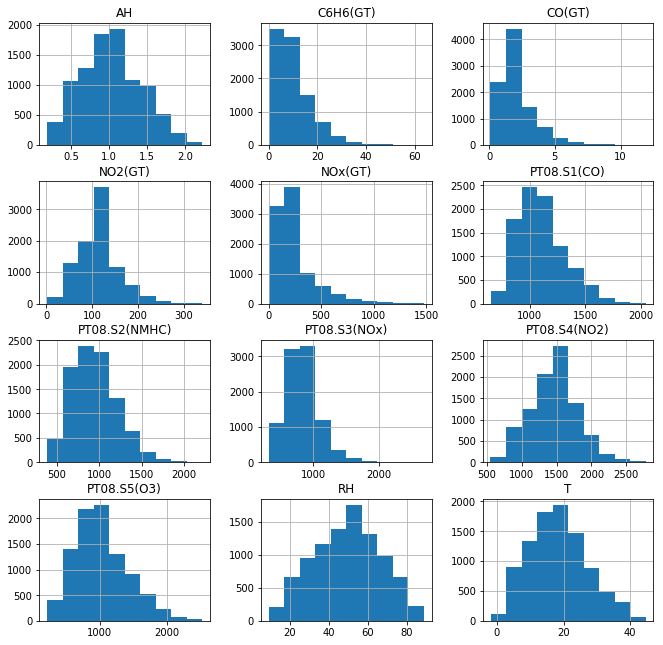

In [24]:
train_df2[train_df2.dtypes[(train_df2.dtypes=="float64")|(train_df2.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [29]:
train_df2.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

In [30]:
X_train=train_df2

In [31]:
X_train=X_train.drop(['RH'],axis=1)
X_train_drp=X_train.drop(['CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','PT08.S4(NO2)'],axis=1)

In [32]:
X_train_drp.columns

Index(['NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)', 'T', 'AH'], dtype='object')

In [33]:
Y_train=train_df2["RH"]

In [35]:
from sklearn.model_selection import train_test_split
X_train1, X_test, Y_train1, Y_test = train_test_split(X_train, Y_train, random_state=1, test_size=0.2)
X_train1_drp, X_test_drp, Y_train1, Y_test = train_test_split(X_train_drp, Y_train, random_state=1, test_size=0.2)

In [37]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
train_minmax=min_max.fit_transform(X_train1)
test_minmax=min_max.fit_transform(X_test)

train_drp_minmax=min_max.fit_transform(X_train1_drp)
test_drp_minmax=min_max.fit_transform(X_test_drp)

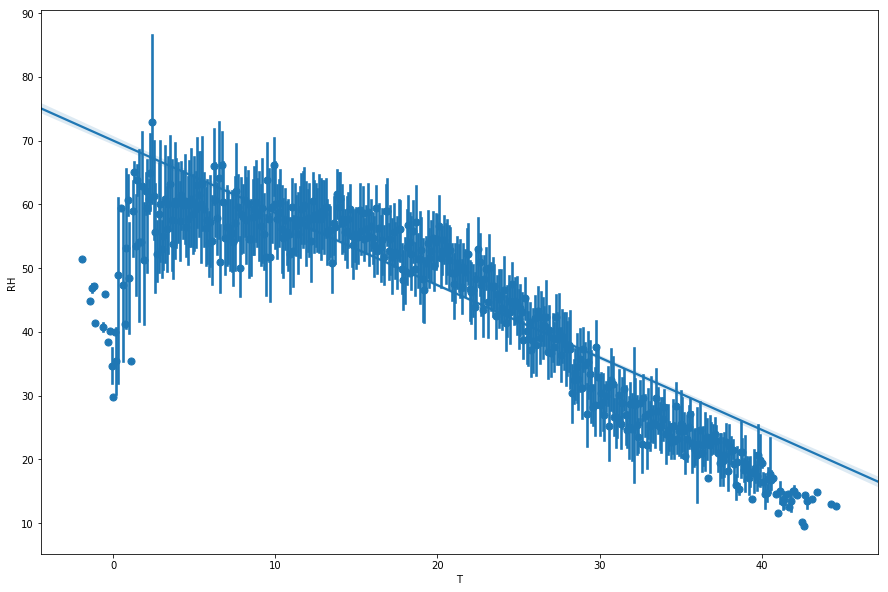

In [40]:
plt.figure(figsize=(15,10))
ax=sns.regplot(x='T',y="RH",data=train_df2,x_estimator=np.mean)
plt.show()

In [41]:
# for each X, calculate VIF(Variance inflation factor)and save in dataframe, this is to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF factor"] = [variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [42]:
print(vif)

    VIF factor       features
0    17.904441         CO(GT)
1   191.566377    PT08.S1(CO)
2    55.476825       C6H6(GT)
3   380.108677  PT08.S2(NMHC)
4    13.732152        NOx(GT)
5    21.722752   PT08.S3(NOx)
6    27.395861        NO2(GT)
7   233.230500   PT08.S4(NO2)
8    66.693119    PT08.S5(O3)
9    16.809231              T
10   36.140937             AH


In [46]:
corr=train_df2.corr()

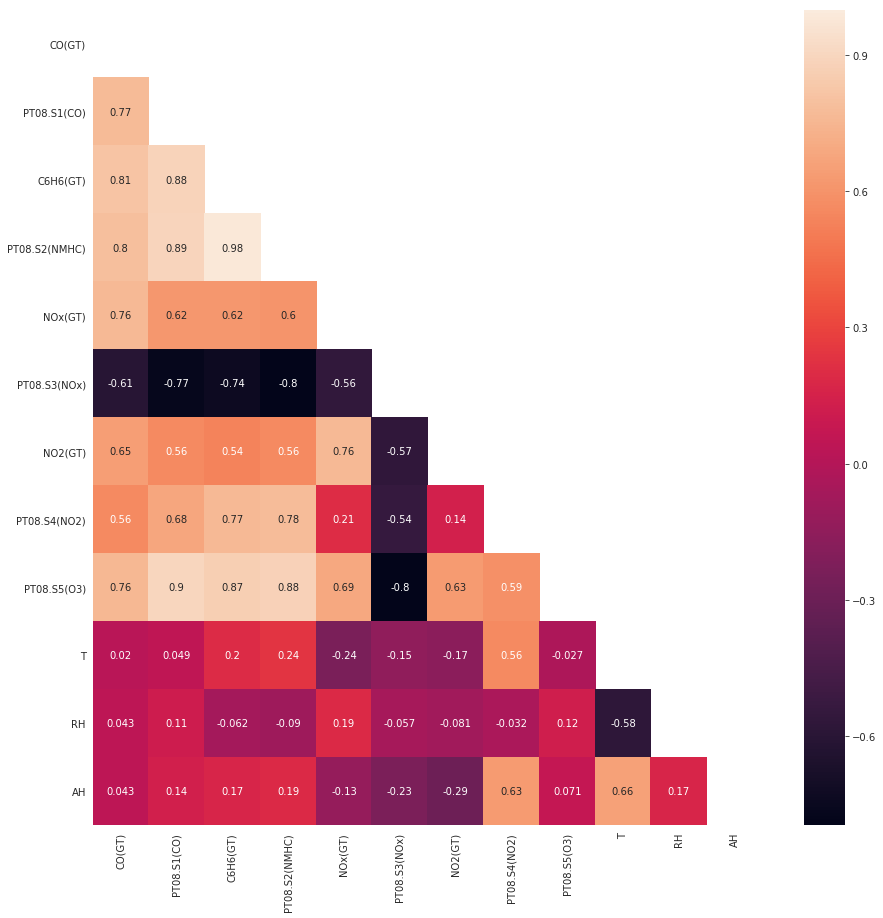

In [48]:
#heatmap show the correlationship between each of the variable
plt.figure(figsize=(15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, annot=True)   

In [50]:
#Using linearRegression
# import LinearRegression from Sklearn

from sklearn.linear_model import LinearRegression

lin_model=LinearRegression()
lin_model1 = LinearRegression()
lin_model.fit(train_drp_minmax, Y_train1)
lin_model1.fit(train_minmax, Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
coef1 = pd.DataFrame(lin_model.coef_, index=X_train_drp.columns)
print(coef1)

coef2 = pd.DataFrame(lin_model1.coef_, index=X_train.columns)
print(coef1)

                       0
NOx(GT)         9.029127
PT08.S3(NOx)    2.856629
NO2(GT)        -8.747894
PT08.S5(O3)     4.262712
T            -108.052913
AH             82.262088
                       0
NOx(GT)         9.029127
PT08.S3(NOx)    2.856629
NO2(GT)        -8.747894
PT08.S5(O3)     4.262712
T            -108.052913
AH             82.262088


In [52]:
data_train_predictions1 = lin_model.predict(test_drp_minmax)
print(data_train_predictions1)
data_train_predictions2 = lin_model1.predict(test_minmax)
print(data_train_predictions2)

[54.6046074  62.98100857 71.83294846 ... 71.74541583 46.11168706
 58.26365656]
[53.80398925 62.23232516 70.1159139  ... 69.48996124 43.52216815
 54.29110139]


In [53]:
print("RMSE:",(np.sqrt(metrics.mean_squared_error(Y_test,data_train_predictions1))))
print("RMSE:",(np.sqrt(metrics.mean_squared_error(Y_test,data_train_predictions2))))

RMSE: 6.575642218609559
RMSE: 6.2519052317102295


In [54]:
print(lin_model.score(test_drp_minmax,Y_test))
print(lin_model1.score(test_minmax,Y_test))

0.8494514234666297
0.8639103567345447


In [55]:
print(metrics.r2_score(Y_test,data_train_predictions1))
print(metrics.r2_score(Y_test,data_train_predictions2))

0.8494514234666297
0.8639103567345447


In [56]:
X_train.iloc[:,0:10].columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T'],
      dtype='object')

In [57]:
X_train1.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
6962,6.2,1739.0,21.3,1333.0,821.000000,460.0,174.000000,1689.0,1832.0,11.3,1.0455
4301,1.3,965.0,5.1,769.0,246.896735,878.0,113.091251,1315.0,667.0,25.9,1.0826
3705,0.6,869.0,2.4,614.0,246.896735,1001.0,113.091251,1565.0,674.0,25.6,2.0566
4890,1.7,1158.0,10.8,1008.0,246.896735,695.0,113.091251,1489.0,1175.0,24.6,1.3053
9338,2.5,1180.0,7.9,894.0,355.000000,636.0,187.000000,1200.0,1372.0,17.5,0.8073


In [58]:
# Without scaling

lin_model_withoutscale = LinearRegression()
lin_model_withoutscale.fit(X_train1,Y_train1) 
coef12 = pd.DataFrame(lin_model_withoutscale.coef_, index=X_train.columns)
print(coef12)
data_pred_train = lin_model_withoutscale.predict(X_test)
print(data_pred_train)
print("RMSE:",(np.sqrt(metrics.mean_squared_error(Y_test,data_pred_train))))
print(lin_model1.score(X_test,Y_test))
print(metrics.r2_score(Y_test,data_pred_train))

                       0
CO(GT)         -0.526847
PT08.S1(CO)     0.010008
C6H6(GT)       -0.777630
PT08.S2(NMHC)   0.002277
NOx(GT)         0.015631
PT08.S3(NOx)   -0.000889
NO2(GT)        -0.036187
PT08.S4(NO2)    0.014211
PT08.S5(O3)    -0.001007
T              -2.321383
AH             34.131667
[53.29385147 60.61455371 66.76824488 ... 68.88213793 42.94741757
 55.58978721]
RMSE: 6.041769636510455
-14315336.309439799
0.872904952514318


In [59]:
#using Decision Tree

my_tree_one = tree.DecisionTreeRegressor(criterion="mse", max_depth=3)
my_tree_one = my_tree_one.fit(train_minmax,Y_train1)
my_tree_one

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [61]:
# the featue_importance_attribute make it simple to interpret the significance of the predictors you include
print(my_tree_one.feature_importances_)
print(my_tree_one.score(train_minmax,Y_train1))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.74942044 0.25057956]
0.6294124247761766


In [62]:
pred = my_tree_one.predict(test_minmax)
pred

array([66.51452682, 66.51452682, 66.51452682, ..., 52.40264924,
       49.07616361, 48.3405    ])

In [63]:
#print mean squared error
df_mse = np.sqrt(metrics.mean_squared_error(Y_test,pred))
df_mse

10.402713698928254

In [64]:
print(my_tree_one.score(test_minmax,Y_test))

0.6232150083176032
